In [5]:
!pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in c:\users\oscar\anaconda3\lib\site-packages (0.12.7a0)


             Open   High    Low  Close  Volume
Date                                          
2020-01-02  332.5  339.0  332.5  339.0   33282
2020-01-03  344.0  345.0  335.5  339.5   42023
2020-01-06  333.0  334.5  332.0  332.0   45677
2020-01-07  332.5  333.0  326.5  329.5   51746
2020-01-08  325.0  333.0  325.0  329.5   37913
...           ...    ...    ...    ...     ...
2020-12-10  511.0  515.0  510.0  512.0   43991
2020-12-11  517.0  517.0  505.0  516.0   51296
2020-12-14  512.0  513.0  508.0  508.0   30809
2020-12-15  507.0  510.0  504.0  504.0   43059
2020-12-16  509.0  515.0  507.0  512.0   53661

[234 rows x 5 columns]


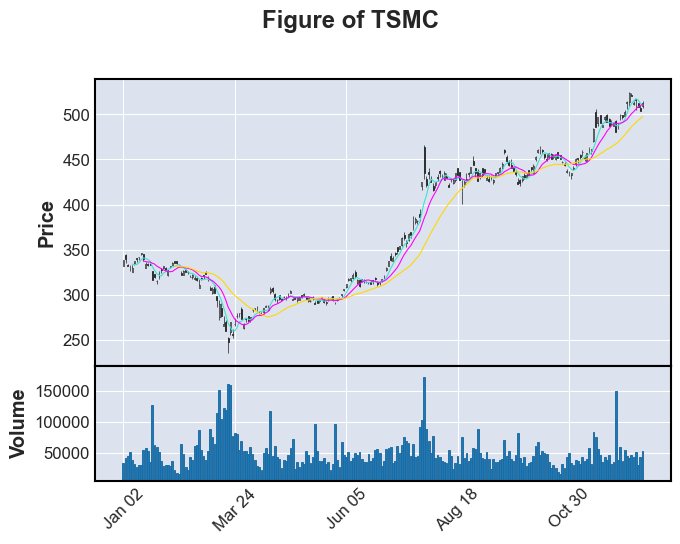

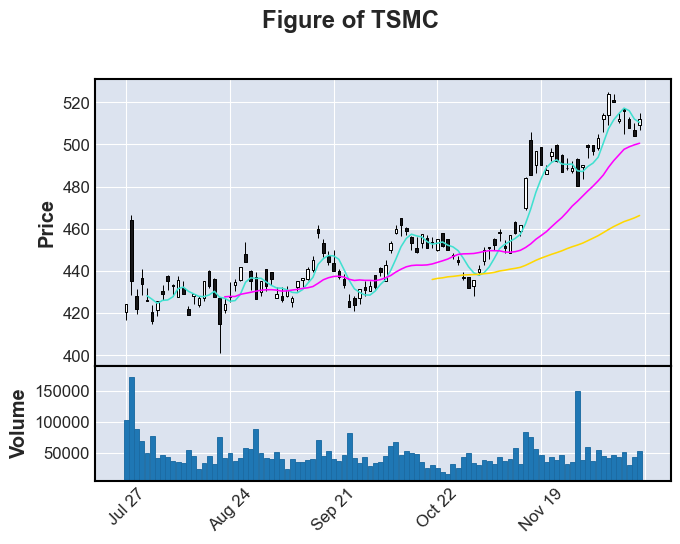

In [8]:
import mplfinance as mpf
import pandas as pd

import matplotlib.dates as mdates

from datetime import datetime
import time


SData = pd.read_csv('2330_2020.csv', index_col = 'Date')
SData.index = pd.DatetimeIndex(SData.index)
SData1 = SData.tail(100)

print(SData)
import mplfinance as mpf


mpf.plot(SData, type='candle',
        title='Figure of TSMC',
        ylabel='Price',
        ylabel_lower='Volume',
        volume=True, 
        mav=(5, 10, 24)) 

mpf.plot(SData1, type='candle',
        title='Figure of TSMC',
        ylabel='Price',
        ylabel_lower='Volume',
        volume=True, 
        mav=(5, 20, 60))  # 5日線、10日線、季線

242


ValueError: x and y must have same first dimension, but have shapes (242,) and (40,)

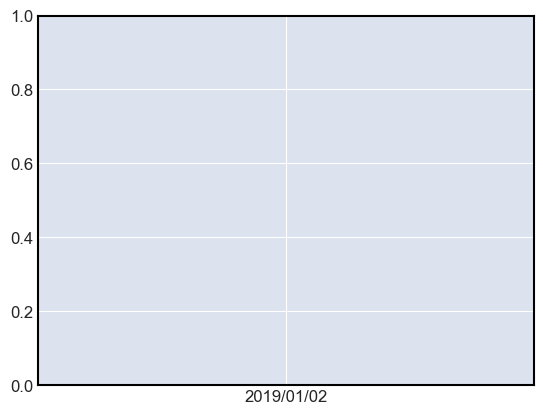

In [151]:
# 選取部分資料（例如只選取2020年的股票資料）後畫圖

from datetime import datetime
import pandas as pd

SData = pd.read_csv('0050_new.csv')    
# 先不要設定index_col = 'Date'，之後再設定，以便選取部分資料

# SData2 = SData[SData['Date'].str.startswith('2020') | SData['Date'].str.startswith('2019')]  # 取部分資料
SData2 = SData[SData['Date'].str.startswith('2019')]  # 只取2020年的資料
SData2.index = SData2['Date']

# SData2.set_index("Date" , inplace=True)  #  上一行也可以使用這一行取代
SData2.index = pd.DatetimeIndex(SData2.index)


N=0
dwt=0
temp = 0
temp1 = 0
up = []
RSI=[]
dw = []
i=0

x = len(SData2.Open)

print(x)


for i in range(1,x) :
    N = N + 1

    if SData.Close[i] > SData.Close[i-1]:
        up.append(SData.Close[i]-SData.Close[i-1])
                
    if SData.Close[i] < SData.Close[i-1]:
        dw.append(SData.Close[i-1]-SData.Close[i])
        dwt = dwt + 1
        
    i = i + 1
    
    if N == 6:
                temp = sum(up)/N
                up = []
                temp1 = sum(dw)/N
                dw = []    
                RSI.append(round(100*temp/(temp+temp1)))
                N = 0
                
plt.plot(SData2['Date'],RSI)


import mplfinance as mpf
mpf.plot(SData2)

In [13]:
print(mpf.available_styles())

['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']


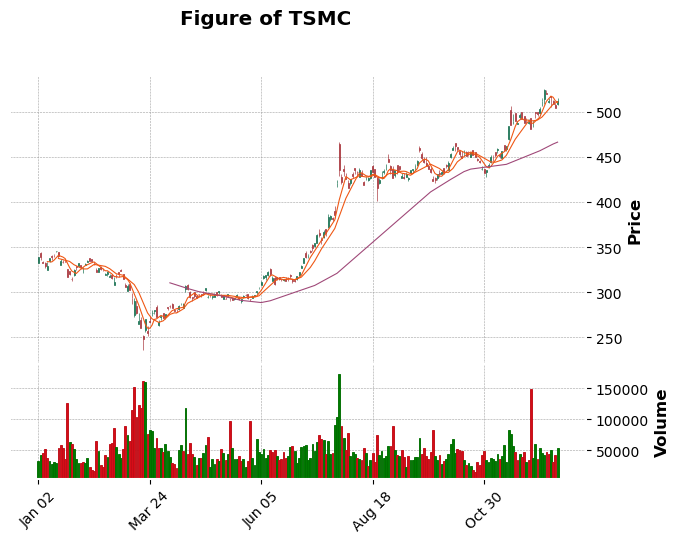

In [35]:
from datetime import datetime
import pandas as pd

SData = pd.read_csv('2330_2020.csv', index_col = 'Date')
SData.index = pd.DatetimeIndex(SData.index)

import mplfinance as mpf
mpf.plot(SData, type = 'candle',
         mav = [5, 10, 60],
         title='Figure of TSMC',
         style ='charles',
         volume = True)

In [2]:
from datetime import datetime
import pandas as pd
import mplfinance as plt



SData = pd.read_csv('0050_new.csv', index_col = 'Date')
SData.index = pd.DatetimeIndex(SData.index)
SData = SData.loc['2020/12/05':'2020/12/16',:]


N=0
dwt=0
temp = 0
temp1 = 0
up = []
RSI=[]
dw = []
i=0

x = len(SData.Open)

print(x)


for i in range(1,x) :
    N = N + 1

    if SData.Close[i] > SData.Close[i-1]:
        up.append(SData.Close[i]-SData.Close[i-1])
                
    if SData.Close[i] < SData.Close[i-1]:
        dw.append(SData.Close[i-1]-SData.Close[i])
        dwt = dwt + 1
        
    i = i + 1
    
    if N == 6:
                temp = sum(up)/N
                up = []
                temp1 = sum(dw)/N
                dw = []    
                RSI.append(round(100*temp/(temp+temp1)))
                N = 0
                print(RSI)


plt.plot(RSI)           
plt.show()
                
                



8
[37.0]


NameError: name 'plt' is not defined

In [3]:
 a = [line for line in SData1 if datetime.strptime(line[0], '%Y/%m/%d').year == y]
    for m in range(1,13):
        s_date2.append(str(y)+"/"+str(m))
        close = 0
        num = 0
        close_avg = 0
        volume = 0
        SData2 = [line for line in a if datetime.strptime(line[0], '%Y/%m/%d').month == m]
        s_volume = [float(line[3]) for line in SData2]
        for data in s_volume:
            volume = volume + data
        s_volume_avg.append(round(volume))
        s_close = [float(line[2]) for line in SData2]
        for close_data in s_close:
            close = close + close_data
            num = num + 1
        close_avg = close / num
        s_close_avg.append(round(close_avg))
        
        import mplfinance as mpf

mpf.plot(SData, type = 'candle',title = '\nFigure of 0050', mav = [5, 20, 60], volume = True, style ='charles', figscale = 1)     # 圖案大小
mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True, style ='charles', figscale = 2, figratio=(2,1))   # 長寬比例(figratio)

IndentationError: unexpected indent (<ipython-input-3-080159919842>, line 2)

                  Date   Open   High    Low  Close  Volume
Date                                                      
2020-11-02  2020/11/02  433.0  435.5  428.0  435.5   34539
2020-11-03  2020/11/03  439.5  443.0  438.0  441.0   31461
2020-11-04  2020/11/04  444.5  451.5  443.0  450.0   37929
2020-11-05  2020/11/05  451.5  451.5  445.5  451.0   36539
2020-11-06  2020/11/06  455.0  455.5  450.0  452.5   32644
2020-11-09  2020/11/09  458.0  460.0  454.0  458.5   43415
2020-11-10  2020/11/10  452.0  454.5  448.5  451.0   36786
2020-11-11  2020/11/11  448.5  457.0  448.5  457.0   40355
2020-11-12  2020/11/12  463.0  463.5  457.5  458.0   57993
2020-11-13  2020/11/13  459.0  462.0  456.5  462.0   31483
2020-11-16  2020/11/16  470.0  484.5  469.0  484.0   83380
2020-11-17  2020/11/17  502.0  506.0  485.5  485.5   75763
2020-11-18  2020/11/18  490.0  497.0  486.5  497.0   56607
2020-11-19  2020/11/19  499.0  499.0  490.0  490.0   47345
2020-11-20  2020/11/20  486.0  490.0  486.0  488.0   352

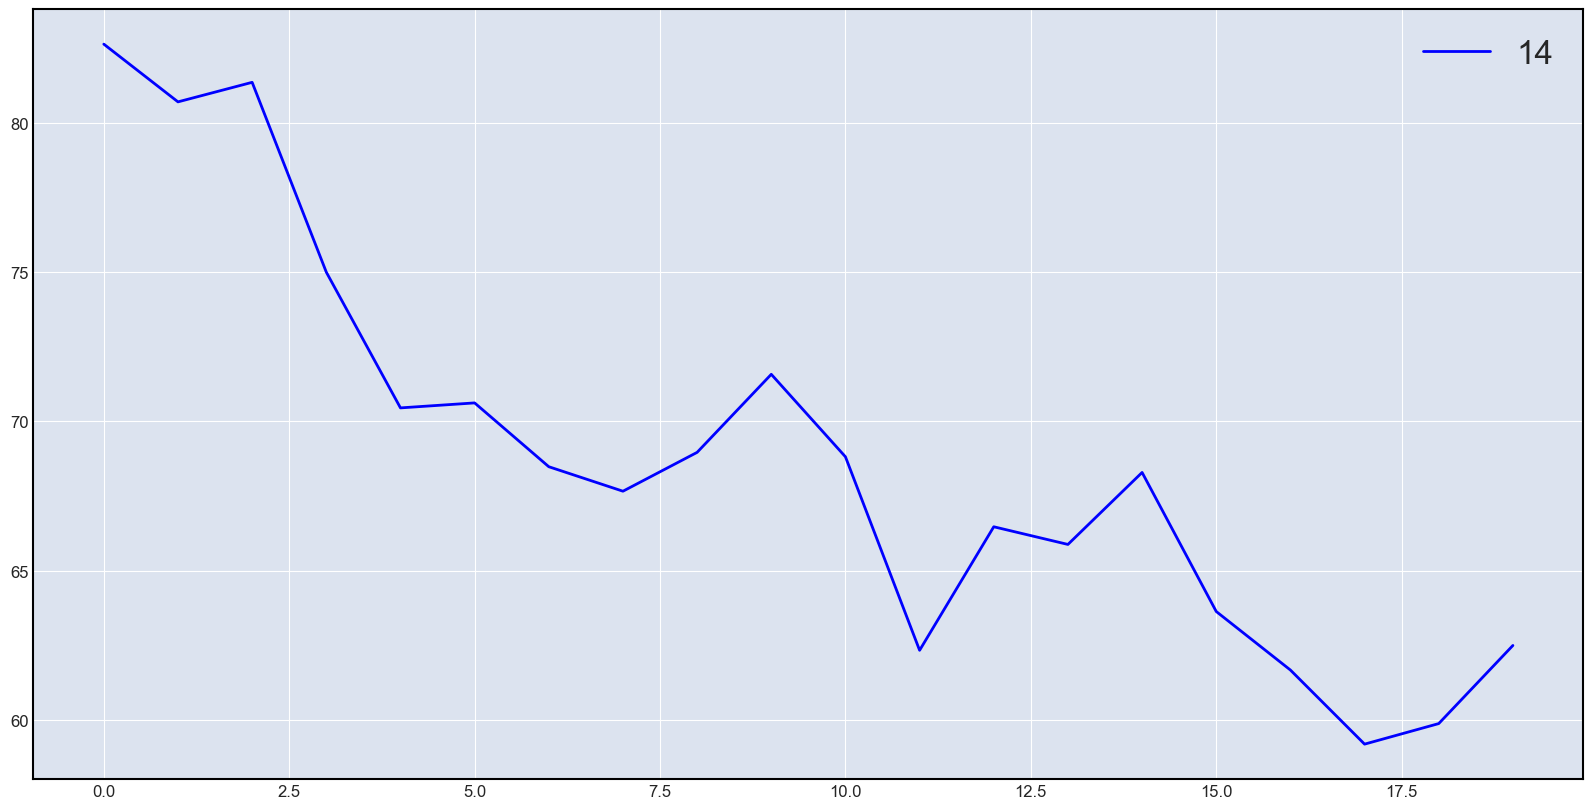

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
stocks = pd.read_csv('0050_new.csv')

stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks = stocks.loc['2020/11/01':'2020/12/16',]

print(stocks)

x = len(stocks['Date'])
print(x)

rsi_sell = [30 for i in range(1, x)]
print(rsi_sell)

stocks_close = [float(line) for line in stocks['Close']]
print(stocks_close)
delta = [np.nan]
up = []
down = []
rsi = []


for i in range(1, x):
    delta.append(round(stocks_close[i] - stocks_close[i-1], 2))


for key in delta:
    up.append(key if key > 0 else 0)
    down.append(key if key < 0 else 0)
    

for i in range(13, x):
    up_avg = sum(up[i-13:i+1])/14
    down_avg = abs(sum(down[i-13:i+1])/14)
    rsi.append(100*up_avg/(up_avg + down_avg))
    
plt.figure(figsize = (20, 10))
plt.plot(rsi, label = '14', color = 'blue')
plt.legend(fontsize = 24)
plt.show()
